In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from pandas.api.types import is_numeric_dtype
from scipy.stats import pearsonr


In [2]:
from ToolBox import cardinalidad, describe_df, get_features_cat_regression, plot_features_cat_regression, get_features_num_regression, plot_features_num_regression

In [3]:
df = pd.read_csv("./data/advertising_ml.csv")

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   object 
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB


In [6]:
#Limpieza de nuestro Dataframe

df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)').astype(int)

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Area Income'] = df['Area Income'].astype(float)
df.dtypes['Area Income']

dtype('float64')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


In [8]:
cardinalidad(df, 10, 0.3)

,nombre_variable,valores_unicos,cardinalidad,tipo_sugerido
0,Daily Time Spent on Site,900,0.900,Numerica Continua
1,Age,43,0.043,Numerica Discreta
2,Area Income,1000,1.000,Numerica Continua
3,Daily Internet Usage,966,0.966,Numerica Continua
4,Ad Topic Line,1000,1.000,Numerica Continua
5,City,969,0.969,Numerica Continua
6,Male,2,0.002,Binaria
7,Country,237,0.237,Numerica Discreta
8,Timestamp,1000,1.000,Numerica Continua
9,Clicked on Ad,2,0.002,Binaria


In [9]:
describe_df(df_in=df)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
DATA_TYPE,float64,int64,float64,float64,object,object,int64,object,datetime64[ns],int64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,900,43,1000,966,1000,969,2,237,1000,2
CARDIN (%),0.9,0.043,1.0,0.966,1.0,0.969,0.002,0.237,1.0,0.002


In [10]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
cardinalidad(df_titanic[["who"]], 10, 30).tipo_sugerido[0]

'Categórica'

In [12]:
df_titanic.dropna(inplace=True)

In [13]:
get_features_cat_regression(df_titanic, "age")

Para 'age' y 'survived' el p-value es: 0.0006641019760370104 (Test realizado: Mann-Whitney U)
0.0006641019760370104
Para 'age' y 'pclass' el p-value es: 0.0001047039989116775 (Test aplicado: ANOVA)
Para 'age' y 'sex' el p-value es: 0.008040695758472983 (Test realizado: Mann-Whitney U)
0.008040695758472983
Para 'age' y 'sibsp' el p-value es: 0.08944925516766292 (Test aplicado: ANOVA)
Para 'age' y 'parch' el p-value es: 9.908210573457718e-06 (Test aplicado: ANOVA)
Para 'age' y 'embarked' el p-value es: 0.47076868481138634 (Test aplicado: ANOVA)
Para 'age' y 'class' el p-value es: 0.0001047039989116775 (Test aplicado: ANOVA)
Para 'age' y 'who' el p-value es: 2.473319620510907e-16 (Test aplicado: ANOVA)
Para 'age' y 'adult_male' el p-value es: 1.438596801734207e-05 (Test realizado: Mann-Whitney U)
1.438596801734207e-05
Para 'age' y 'deck' el p-value es: 0.00021171214067990695 (Test aplicado: ANOVA)
Para 'age' y 'embark_town' el p-value es: 0.47076868481138634 (Test aplicado: ANOVA)
Para 'a

['survived',
 'pclass',
 'sex',
 'parch',
 'class',
 'who',
 'adult_male',
 'deck',
 'alive',
 'alone']

Para 'age' y 'survived' el p-value es: 0.0006641019760370104 (Test realizado: Mann-Whitney U)
0.0006641019760370104
Para 'age' y 'pclass' el p-value es: 0.0001047039989116775 (Test aplicado: ANOVA)
Para 'age' y 'sex' el p-value es: 0.008040695758472983 (Test realizado: Mann-Whitney U)
0.008040695758472983
Para 'age' y 'sibsp' el p-value es: 0.08944925516766292 (Test aplicado: ANOVA)
Para 'age' y 'parch' el p-value es: 9.908210573457718e-06 (Test aplicado: ANOVA)
Para 'age' y 'embarked' el p-value es: 0.47076868481138634 (Test aplicado: ANOVA)
Para 'age' y 'class' el p-value es: 0.0001047039989116775 (Test aplicado: ANOVA)
Para 'age' y 'who' el p-value es: 2.473319620510907e-16 (Test aplicado: ANOVA)
Para 'age' y 'adult_male' el p-value es: 1.438596801734207e-05 (Test realizado: Mann-Whitney U)
1.438596801734207e-05
Para 'age' y 'deck' el p-value es: 0.00021171214067990695 (Test aplicado: ANOVA)
Para 'age' y 'embark_town' el p-value es: 0.47076868481138634 (Test aplicado: ANOVA)
Para 'a

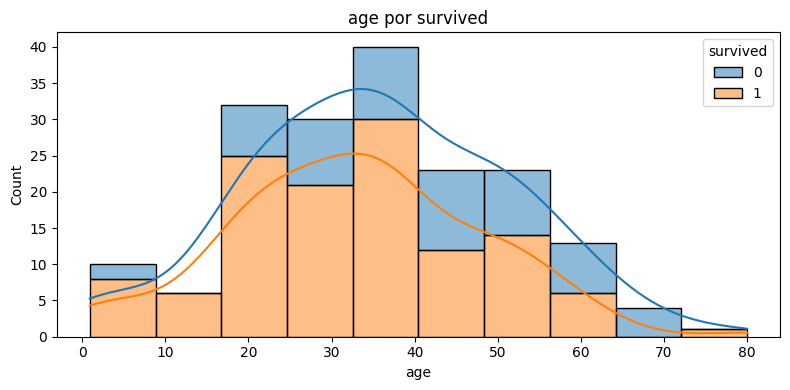

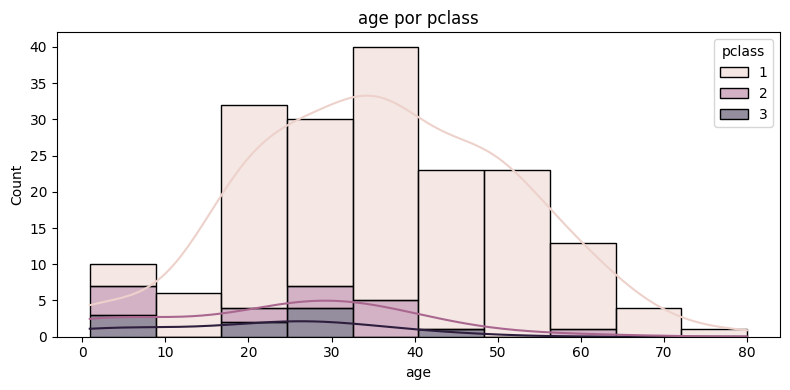

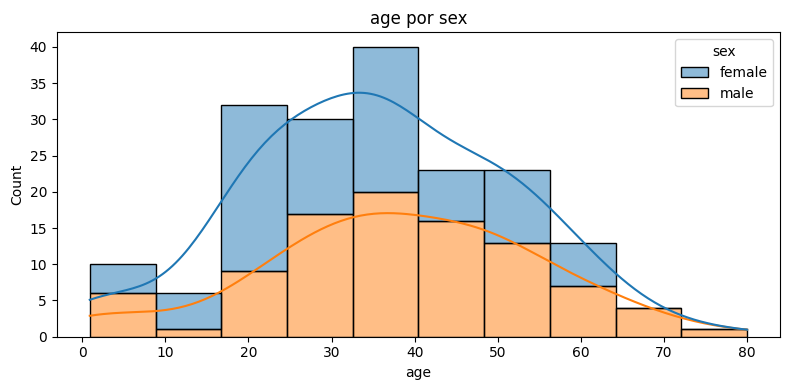

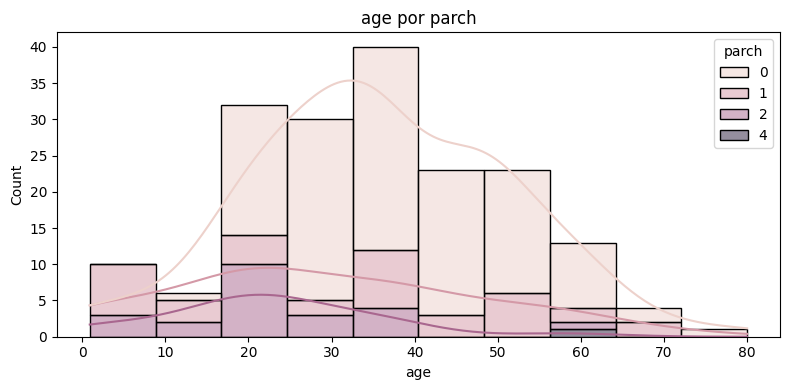

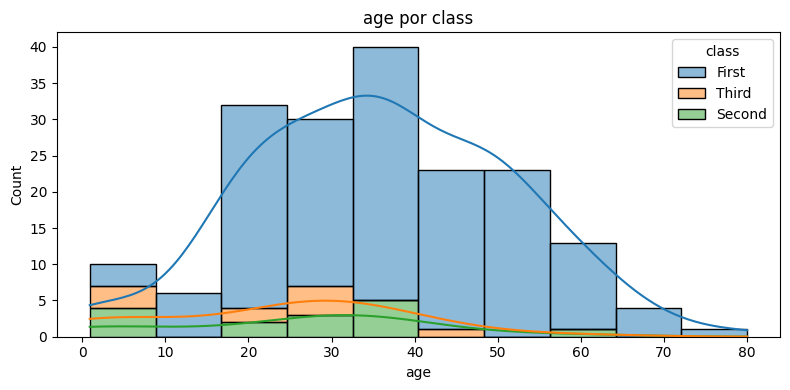

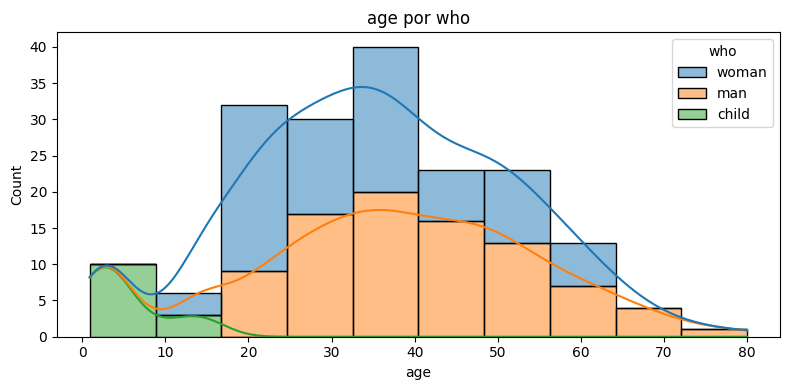

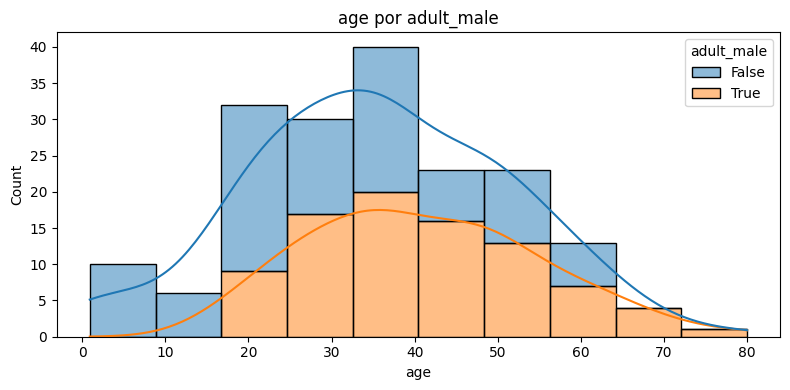

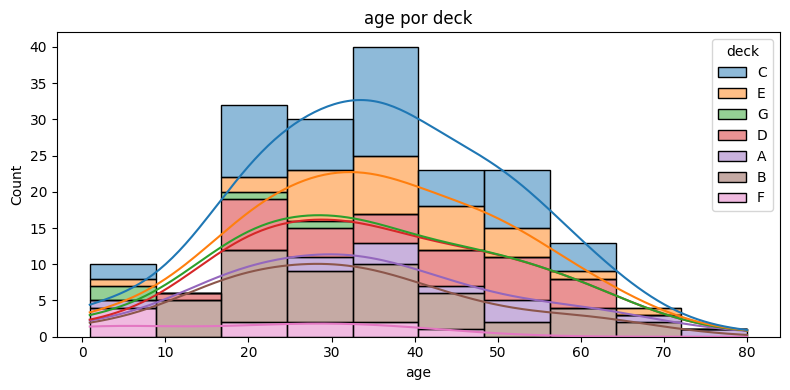

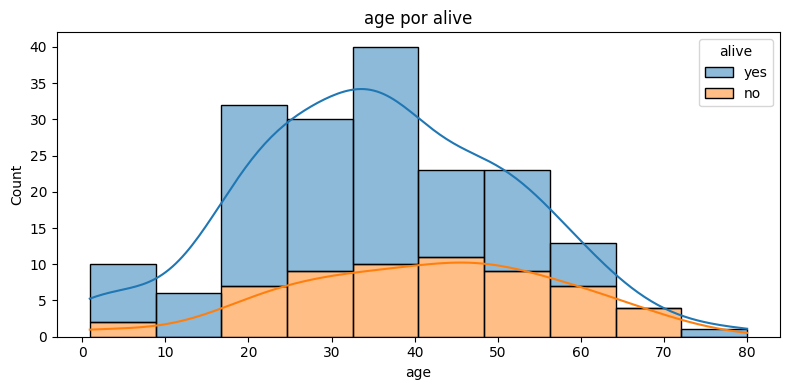

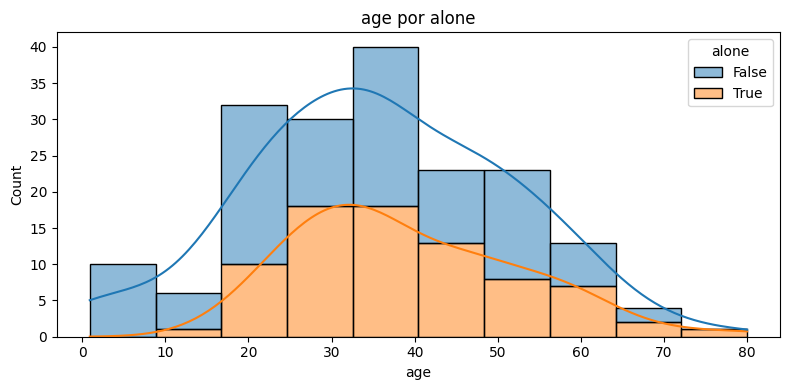

['survived',
 'pclass',
 'sex',
 'parch',
 'class',
 'who',
 'adult_male',
 'deck',
 'alive',
 'alone']

In [14]:
plot_features_cat_regression(df_titanic, "age", with_individual_plot = True)

In [15]:
get_features_num_regression(df, target_col='Area Income', umbral_corr=0.8, p_value=0.05)

Features numericas Ok Validadas
Columnas numéricas en df: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
Correlación entre 'Daily Time Spent on Site' y 'Area Income': 0.31095441252288253
Daily Time Spent on Site no supera el umbral de 0.8
Correlación entre 'Age' y 'Area Income': -0.18260495503262159
Age no supera el umbral de 0.8
Correlación entre 'Daily Internet Usage' y 'Area Income': 0.3374955328652761
Daily Internet Usage no supera el umbral de 0.8
Correlación entre 'Male' y 'Area Income': 0.0013223588849243847
Male no supera el umbral de 0.8
Correlación entre 'Clicked on Ad' y 'Area Income': -0.4762546275321448
Clicked on Ad no supera el umbral de 0.8


[]

Features numericas Ok Validadas
Columnas numéricas en df: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad']
Correlación entre 'Daily Time Spent on Site' y 'Area Income': 0.31095441252288253
Daily Time Spent on Site supera el umbral de 0.1
Correlación entre 'Age' y 'Area Income': -0.18260495503262159
Age supera el umbral de 0.1
Correlación entre 'Daily Internet Usage' y 'Area Income': 0.3374955328652761
Daily Internet Usage supera el umbral de 0.1
Correlación entre 'Male' y 'Area Income': 0.0013223588849243847
Male no supera el umbral de 0.1
Correlación entre 'Clicked on Ad' y 'Area Income': -0.4762546275321448
Clicked on Ad supera el umbral de 0.1
 Daily Time Spent on Site pasa el test de p-value (p=0.0000)
 Age pasa el test de p-value (p=0.0000)
 Daily Internet Usage pasa el test de p-value (p=0.0000)
 Clicked on Ad pasa el test de p-value (p=0.0000)


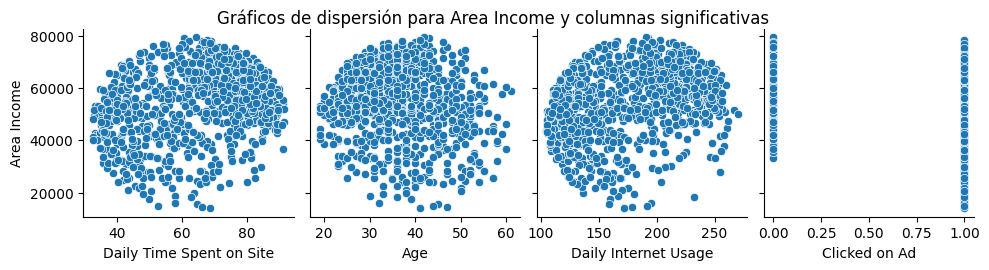

In [17]:
plot_features_num_regression(df, target_col="Area Income", umbral_corr=0.1, pvalue=0.05)